## PCA from scratch, by pandas, and then PLS
#### Plot the raw data, build a PCA model, and plot the results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import MVDA_exploration_tools as mv
import matplotlib.pyplot as plt
import sklearn
import sys
%matplotlib notebook

In [3]:
print('Python version', sys.version)
print('sklearn.__version__', sklearn.__version__)
print('pandas.__version__', pd.__version__)
print('MVDA_exploration_tools.__version__', mv.__version__)

Python version 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
sklearn.__version__ 1.0
pandas.__version__ 1.3.3
MVDA_exploration_tools.__version__ 2021-11-09


In [4]:
dataFrame = pd.read_excel('decimated_spectra.xlsx')
display(dataFrame)

,Unnamed: 0,sample,250,278,306,334,362,390,418,Fel,Met
0,0,fm01,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058,0.01972,0.19112
1,1,fm02,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797,0.02465,0.19112
2,2,fm03,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096,0.02958,0.19112
3,3,fm04,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829,0.01972,0.23890
4,4,fm05,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061,0.02465,0.23890
5,5,fm06,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904,0.02958,0.23890
6,6,fm07,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329,0.02958,0.23890
7,7,fm08,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001,0.01972,0.28668
8,8,fm09,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334,0.02465,0.28668
9,9,fm10,0.720811,0.824102,0.035586,0.163817,0.333757,0.177520,0.014077,0.02958,0.28668


### Define the primary ID (index) of the table as the column named sample

In [5]:
named_Obs_dataFrame = dataFrame.set_index('sample')

In [6]:
named_Obs_dataFrame

,Unnamed: 0,250,278,306,334,362,390,418,Fel,Met
sample,,,,,,,,,,
fm01,0,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058,0.01972,0.19112
fm02,1,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797,0.02465,0.19112
fm03,2,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096,0.02958,0.19112
fm04,3,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829,0.01972,0.23890
fm05,4,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061,0.02465,0.23890
fm06,5,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904,0.02958,0.23890
fm07,6,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329,0.02958,0.23890
fm08,7,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001,0.01972,0.28668
fm09,8,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334,0.02465,0.28668


### Get the selection of the data table designated as X-data

In [7]:
data = named_Obs_dataFrame.loc['fm01':'fm10' , '250':'418']
data

,250,278,306,334,362,390,418
sample,,,,,,,
fm01,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058
fm02,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797
fm03,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096
fm04,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829
fm05,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061
fm06,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904
fm07,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329
fm08,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001
fm09,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334


### Plot the X-data using the pandas plotting tools

<IPython.core.display.Javascript object>


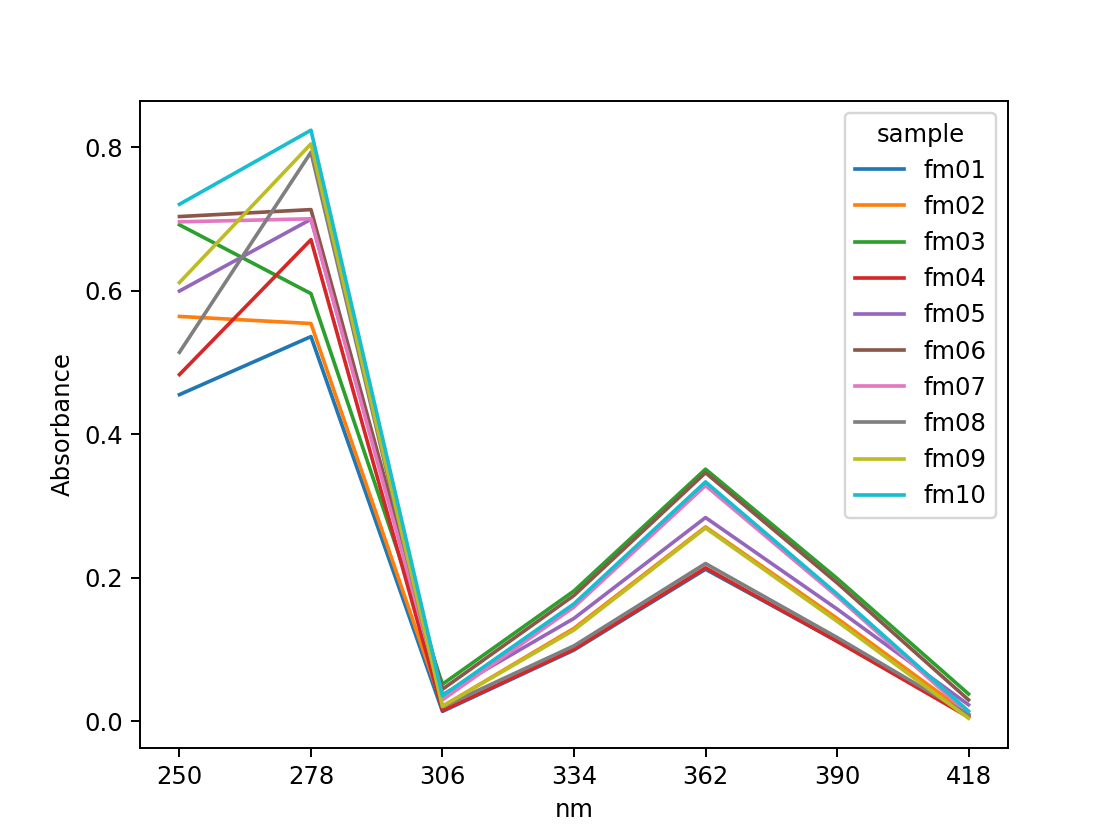

In [8]:
raw_plt_axes = data.T.plot()
raw_plt_axes.set_xlabel('nm')
_ = raw_plt_axes.set_ylabel('Absorbance')

### Calculate and subtract the mean spectrum

In [9]:
data.mean()

250    0.604245
278    0.689523
306    0.028959
334    0.138597
362    0.283099
390    0.152425
418    0.015249
dtype: float64

In [10]:
X = data - data.mean()

In [11]:
display(X)

,250,278,306,334,362,390,418
sample,,,,,,,
fm01,-0.148793,-0.153157,-0.015133,-0.039262,-0.071117,-0.040512,-0.007191
fm02,-0.039793,-0.134959,-0.008114,-0.008925,-0.012066,-0.008876,-0.005452
fm03,0.087981,-0.093210,0.022802,0.043190,0.068446,0.046852,0.022848
fm04,-0.120842,-0.018023,-0.014137,-0.038168,-0.069139,-0.040840,-0.009420
fm05,-0.004356,0.010421,0.008109,0.004928,0.000960,0.004172,0.007812
fm06,0.099473,0.023863,0.015793,0.036885,0.063421,0.040653,0.014656
fm07,0.092093,0.011069,0.000957,0.020782,0.045604,0.021848,-0.004919
fm08,-0.089781,0.103881,-0.008866,-0.033350,-0.063144,-0.035531,-0.006248
fm09,0.007450,0.115532,-0.008037,-0.011302,-0.013624,-0.012860,-0.010914


### Python functions to calculate the PCA and add additional table tags for the PCA output

In [12]:
def results_to_pandas(X, T, P, E=np.array([]), T_symbol='t', P_symbol='p'):
    """Adds pandas table tags to PCA output arrays"""
    P_rows = []
    T_columns = []
    for i in range(P.shape[0]):
        P_rows.append(P_symbol+str(i+1))
        T_columns.append(T_symbol+ str(i+1))
    if isinstance(X, pd.core.frame.DataFrame):
        P_columns = X.columns
        T_rows = X.index
    else:
        P_columns = []
        for j in range(P.shape[1]):
            P_columns.append('var_'+str(j+1).zfill(4))
        T_rows = np.arange(T.shape[0], dtype=int) + 1
        
    P_df = pd.DataFrame(P, columns=P_columns, index=P_rows)
    T_df = pd.DataFrame(T, columns=T_columns, index=T_rows)
    E_df = []
    if E.size:
        for j in range(E.shape[0]):
            E_df.append(pd.DataFrame(E[j], columns=P_columns, index=T_rows))
    return T_df, P_df, E_df


def PCA(X, num_components=3, eps=1e-4, verbose=1):
    """Calculates the PCA of X using the poer method"""

    E = np.zeros((num_components+1, X.shape[0], X.shape[1]))
    T = np.zeros((X.shape[0], num_components))
    P = np.zeros((num_components, X.shape[1]))
    E[0] = np.asarray(X)
    
    for a in range(num_components):
        p_next = np.random.rand(X.shape[1])
        p_prev = np.zeros(X.shape[1])
        iter_cnt = 0
        if verbose > 0:
            print()

        while np.linalg.norm(p_prev - p_next) > eps:
            p_prev = p_next
            T[:,a] = E[a] @ p_prev
            p_next = (T[:,a] @ E[a])/np.linalg.norm(T[:,a] @ E[a])
            iter_cnt += 1
            if verbose > 0:
                print(a+1, iter_cnt, np.linalg.norm(p_prev - p_next))
            
        E[a+1] = E[a] - T[:,a][:, np.newaxis] @ p_next[np.newaxis, :]
        P[a] = p_next
        
    T_pandas, P_pandas, E_pandas = results_to_pandas(X, T, P, E)
    return T_pandas, P_pandas, E_pandas

In [13]:
T, P, E = PCA(X, eps=1e-4)



1 1 1.1802825926249336
1 2 0.06095442742775151
1 3 0.03141572266204415
1 4 0.016214274508945144
1 5 0.008357065952753654
1 6 0.004305780592817714
1 7 0.0022182370018724406
1 8 0.0011427542430004765
1 9 0.0005887010084817625
1 10 0.00030327452527575044
1 11 0.00015623447591781413
1 12 8.048552160349805e-05

2 1 1.5726476184311273
2 2 0.1384187130930408
2 3 0.0025694448391171713
2 4 4.733794556564012e-05

3 1 1.0547120741965814
3 2 0.0011166974869495968
3 3 9.995637417766049e-06


### Check the output of the loadings (P)

In [14]:
P

,250,278,306,334,362,390,418
p1,0.721186,0.499388,0.073896,0.202337,0.370880,0.212114,0.039469
p2,0.321401,-0.854279,0.069041,0.174822,0.298355,0.192662,0.073789
p3,-0.414109,0.117993,0.478132,0.314392,0.114821,0.352949,0.591085


### Check the output of the scores (T)

In [15]:
T

,t1,t2,t3
sample,,,
fm01,-0.228111,0.045572,-0.002747
fm02,-0.105081,0.094678,-0.013867
fm03,0.063540,0.148158,0.014956
fm04,-0.139589,-0.060271,0.001232
fm05,0.005209,-0.007214,0.014660
fm06,0.125005,0.046950,0.011066
fm07,0.097570,0.041285,-0.019798
fm08,-0.051465,-0.150183,0.011221
fm09,0.051985,-0.106186,-0.009409


### Plot the scores using the pandas plot tool scatter

<IPython.core.display.Javascript object>


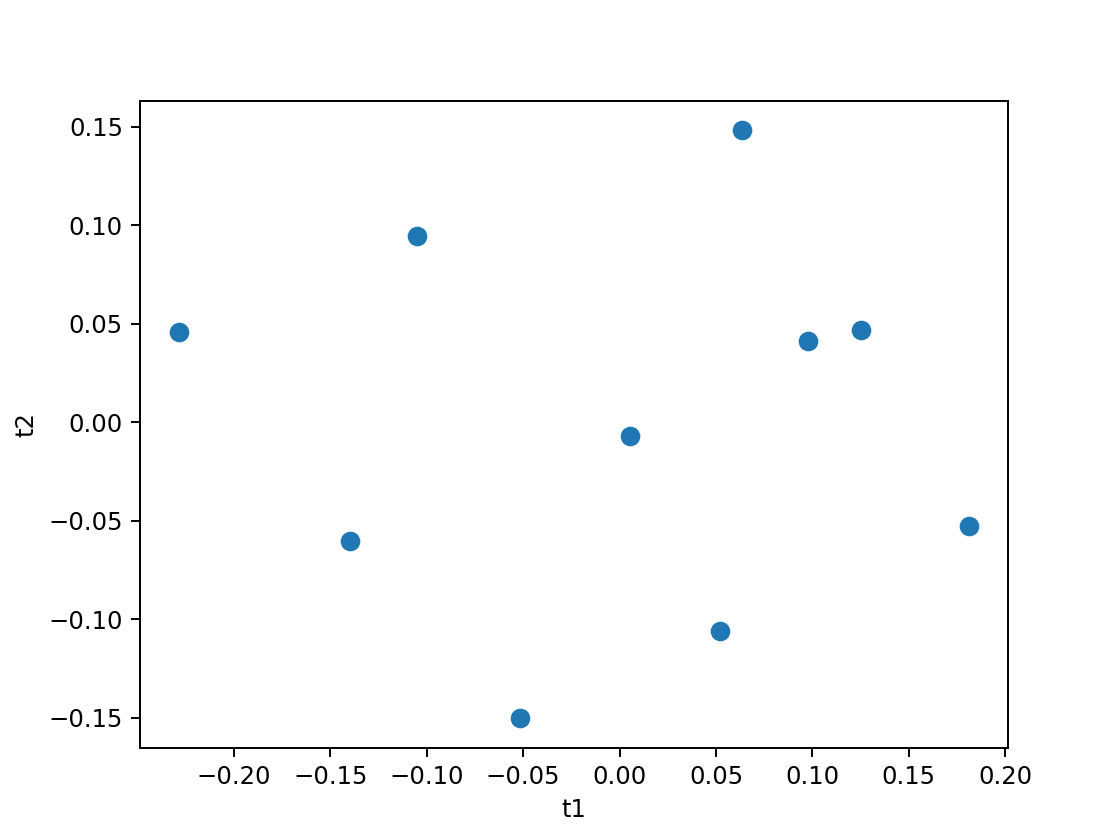

<AxesSubplot:xlabel='t1', ylabel='t2'>

In [16]:
T.plot.scatter(x='t1', y='t2', s=50)

### Get the concentrations for the modelled spectra in a separate table

In [17]:

conc = named_Obs_dataFrame.loc['fm01':'fm10' , ['Met','Fel']]
conc

,Met,Fel
sample,,
fm01,0.19112,0.01972
fm02,0.19112,0.02465
fm03,0.19112,0.02958
fm04,0.23890,0.01972
fm05,0.23890,0.02465
fm06,0.23890,0.02958
fm07,0.23890,0.02958
fm08,0.28668,0.01972
fm09,0.28668,0.02465


### Concatenate the scores table with the conc table to enable color-coded plotting

In [18]:
conc = named_Obs_dataFrame.loc['fm01':'fm10' , ['Met','Fel']]
t_y_table = pd.concat([T, conc], axis=1)

In [19]:
t_y_table

,t1,t2,t3,Met,Fel
sample,,,,,
fm01,-0.228111,0.045572,-0.002747,0.19112,0.01972
fm02,-0.105081,0.094678,-0.013867,0.19112,0.02465
fm03,0.063540,0.148158,0.014956,0.19112,0.02958
fm04,-0.139589,-0.060271,0.001232,0.23890,0.01972
fm05,0.005209,-0.007214,0.014660,0.23890,0.02465
fm06,0.125005,0.046950,0.011066,0.23890,0.02958
fm07,0.097570,0.041285,-0.019798,0.23890,0.02958
fm08,-0.051465,-0.150183,0.011221,0.28668,0.01972
fm09,0.051985,-0.106186,-0.009409,0.28668,0.02465


### Make a color-coded scatter plot

<IPython.core.display.Javascript object>


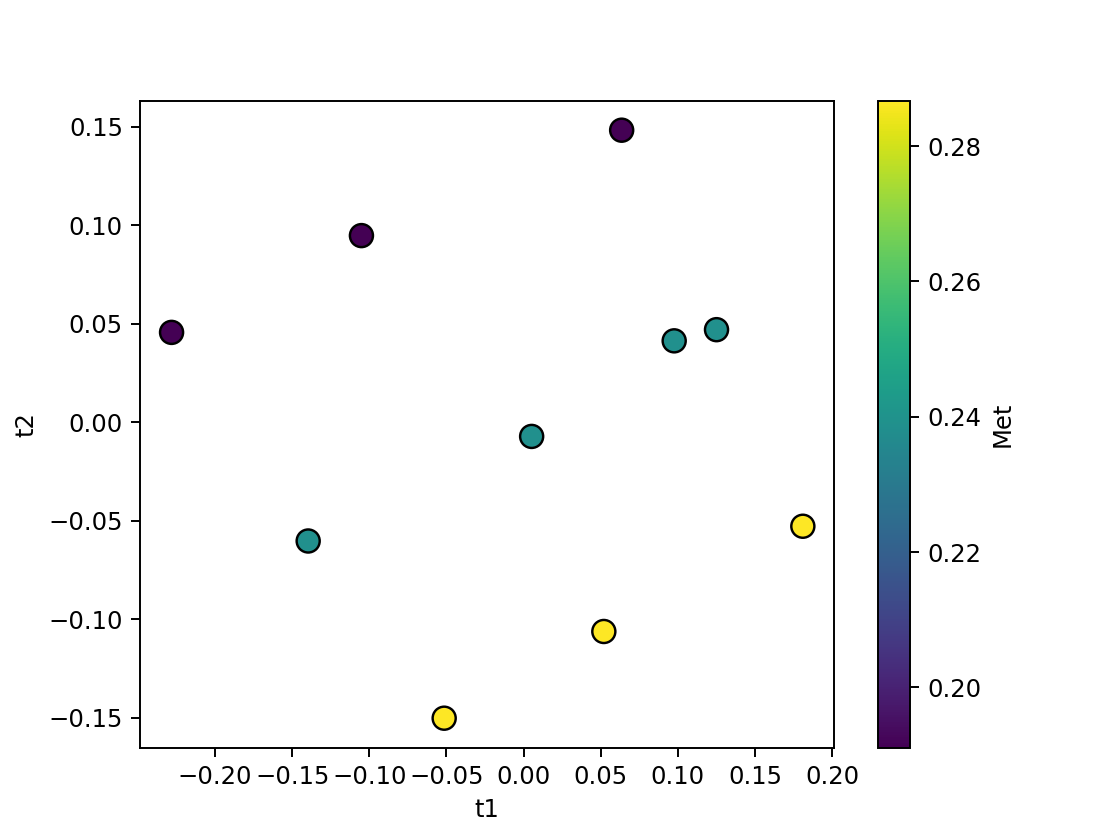

<AxesSubplot:xlabel='t1', ylabel='t2'>

In [20]:
t_y_table.plot.scatter(x='t1', y='t2', c='Met', cmap="viridis", edgecolor='k', s=90)

<IPython.core.display.Javascript object>


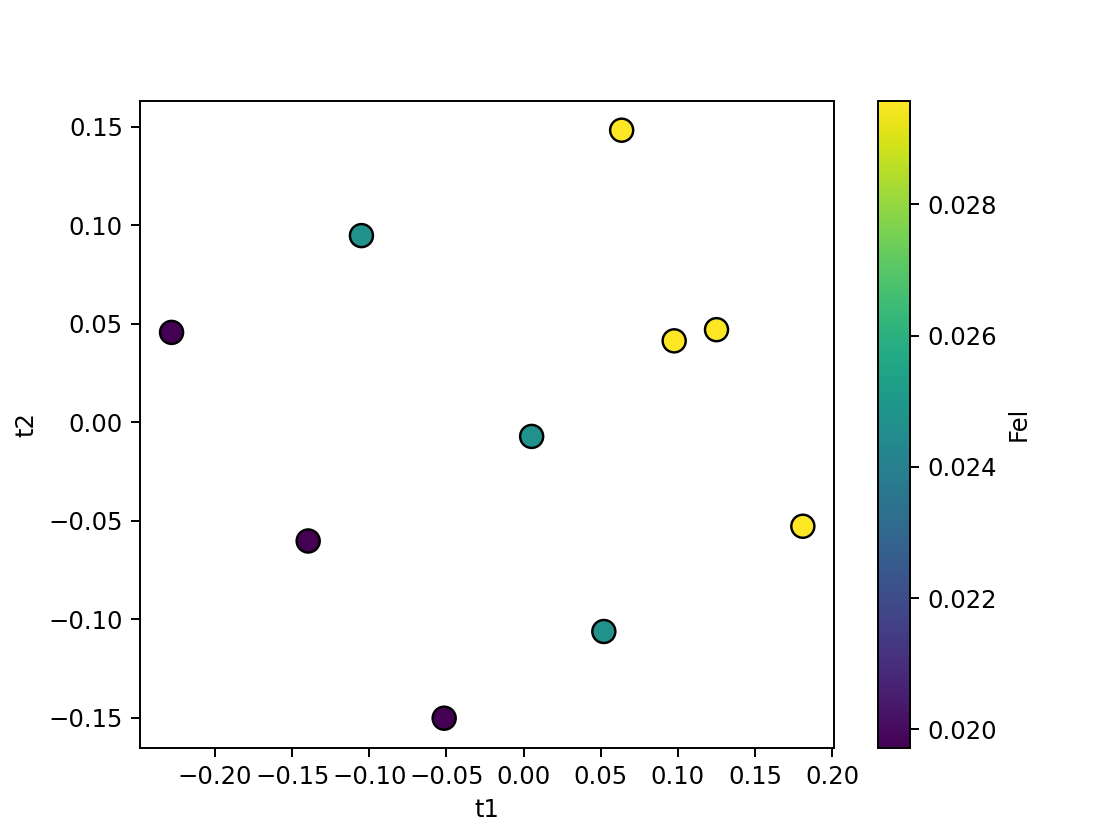

<AxesSubplot:xlabel='t1', ylabel='t2'>

In [21]:
t_y_table.plot.scatter(x='t1', y='t2', c='Fel', cmap="viridis", edgecolor='k', s=90)

### You can also do more than one plot in the same Figure using subplots and axes

<IPython.core.display.Javascript object>


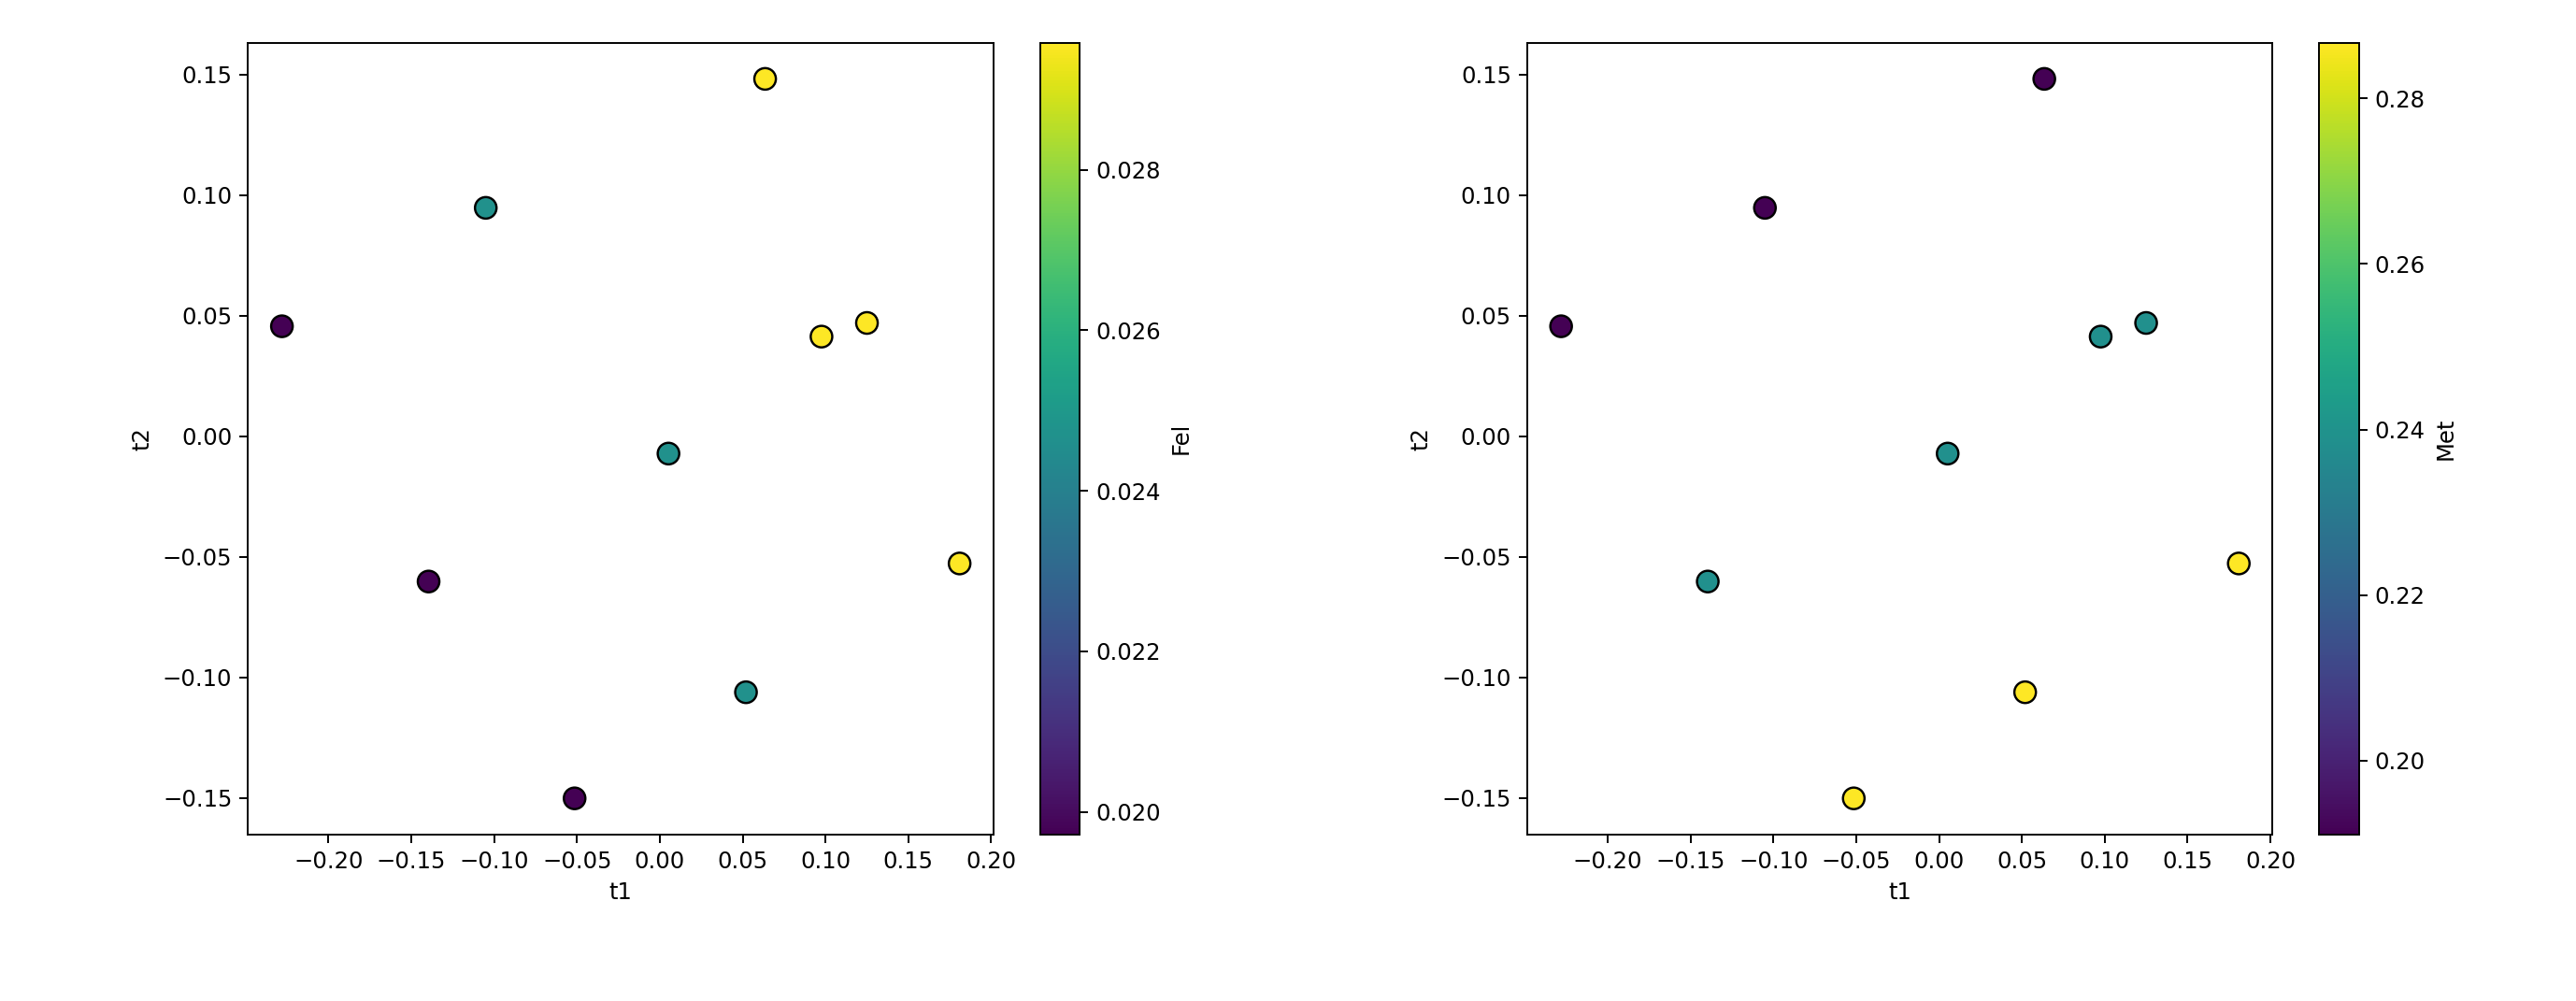

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3.5))
t_y_table.plot.scatter(ax=axes[0], x='t1', y='t2', c='Fel', cmap="viridis", edgecolor='k', s=90)
t_y_table.plot.scatter(ax=axes[1], x='t1', y='t2', c='Met', cmap="viridis", edgecolor='k', s=90)
fig.tight_layout()

### Plot the loadings (P)
Note that here T stands for the transpose of P

<IPython.core.display.Javascript object>


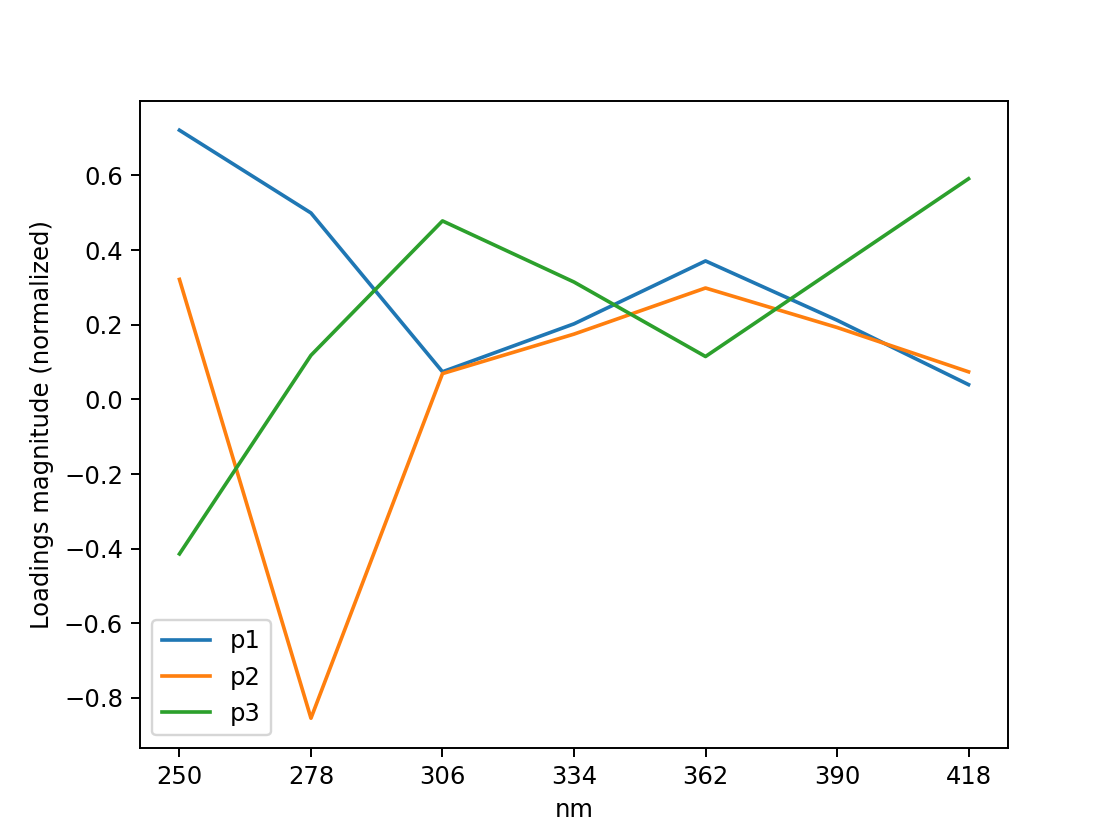

Text(0, 0.5, 'Loadings magnitude (normalized)')

In [23]:
#P.T.plot(xlabel='nm', ylabel='Loadings magnitude (normalized)') 
# Should work in pandas version >= 1.1.0
pd_axes = P.T.plot()
pd_axes.set_xlabel('nm')
pd_axes.set_ylabel('Loadings magnitude (normalized)')

### Check the type and dimensions of the residuals (E)

In [24]:
type(E), type(E[3]), E[3].shape, data.mean().shape

(list, pandas.core.frame.DataFrame, (10, 7), (7,))

### E is a list of residuals after each component
Here we explore the view of the residuals relative to the model mean after 2 principal components

<IPython.core.display.Javascript object>


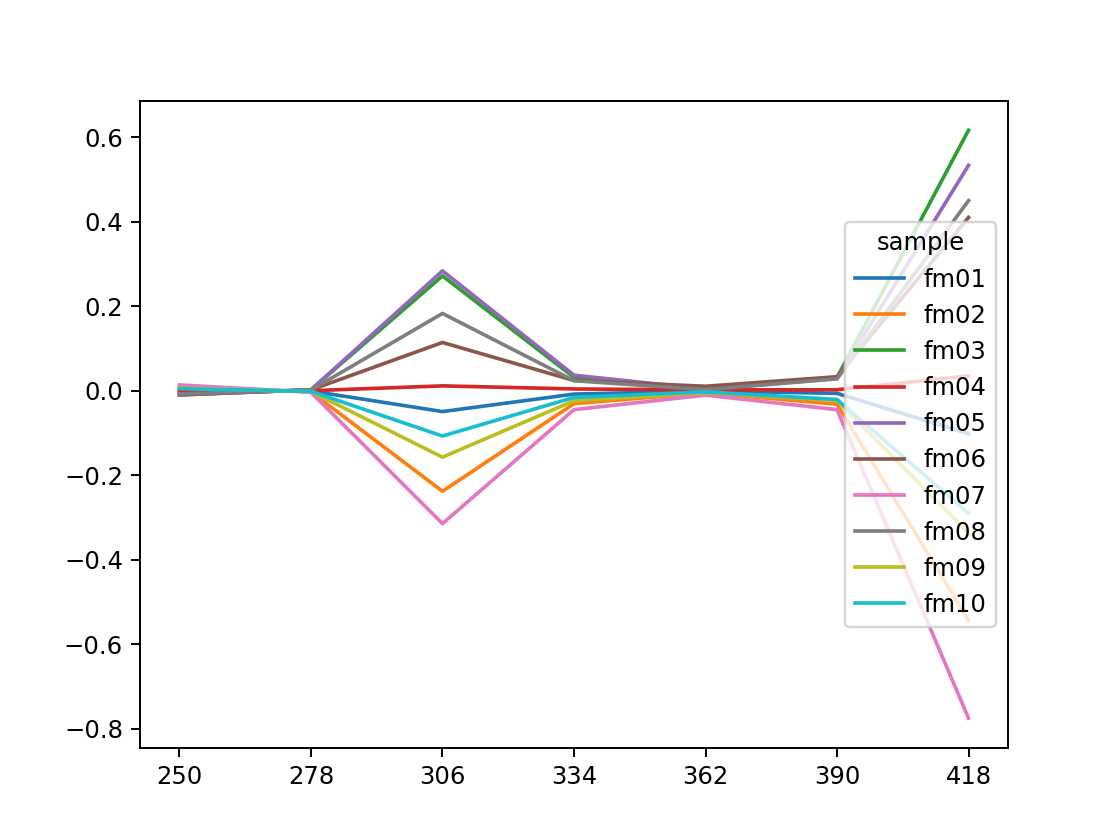

<AxesSubplot:>

In [25]:
E2_relative = E[2]/data.mean()
E2_relative.T.plot()

### Here are the residuals in the original absorbance scale

<IPython.core.display.Javascript object>


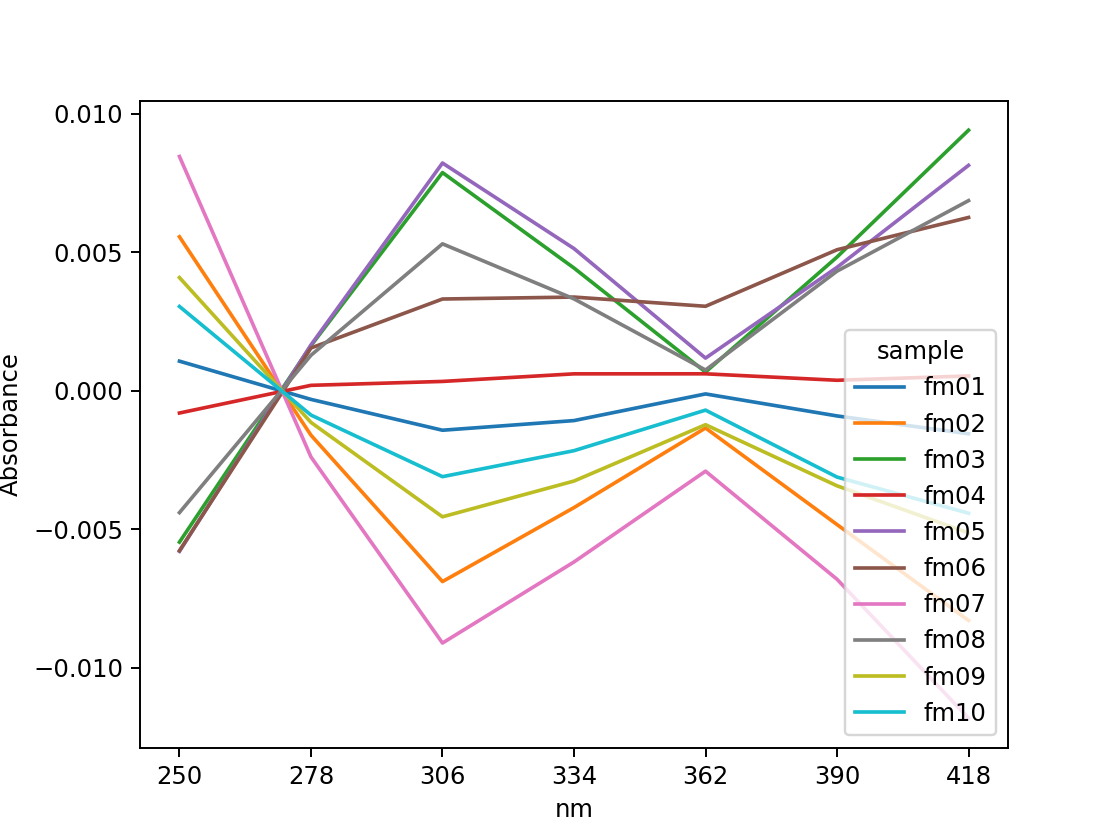

Text(0, 0.5, 'Absorbance')

In [26]:
resid_axes = E[2].T.plot()
resid_axes.set_xlabel('nm')
resid_axes.set_ylabel('Absorbance')

### Above, check fm6?

### Get the cumulated R2 values from a list of array s in E

In [27]:
def get_ndims(E):
    if isinstance(E, list): #Assuming list of arrays
        a = len(E)
    else:
        a = E.shape[0]
    return a

def sumsq(E):
    a = get_ndims(E)
    sumsqs = []
    for a in range(a):
        sumsqs.append(np.sum(np.asarray(E[a])**2))
    return sumsqs

def R2(E):
    R2_lst = []
    sumsqs = sumsq(E)
    num_components = get_ndims(E) - 1
    for a in range(num_components):        
        R2_lst.append(1-sumsqs[a+1]/sumsqs[0])
    R2_df = pd.DataFrame(R2_lst, columns=['R2'], 
                         index=np.arange(num_components, dtype=int)+1)
    return R2_df
     

In [28]:
R2_df = R2(E) 

<IPython.core.display.Javascript object>


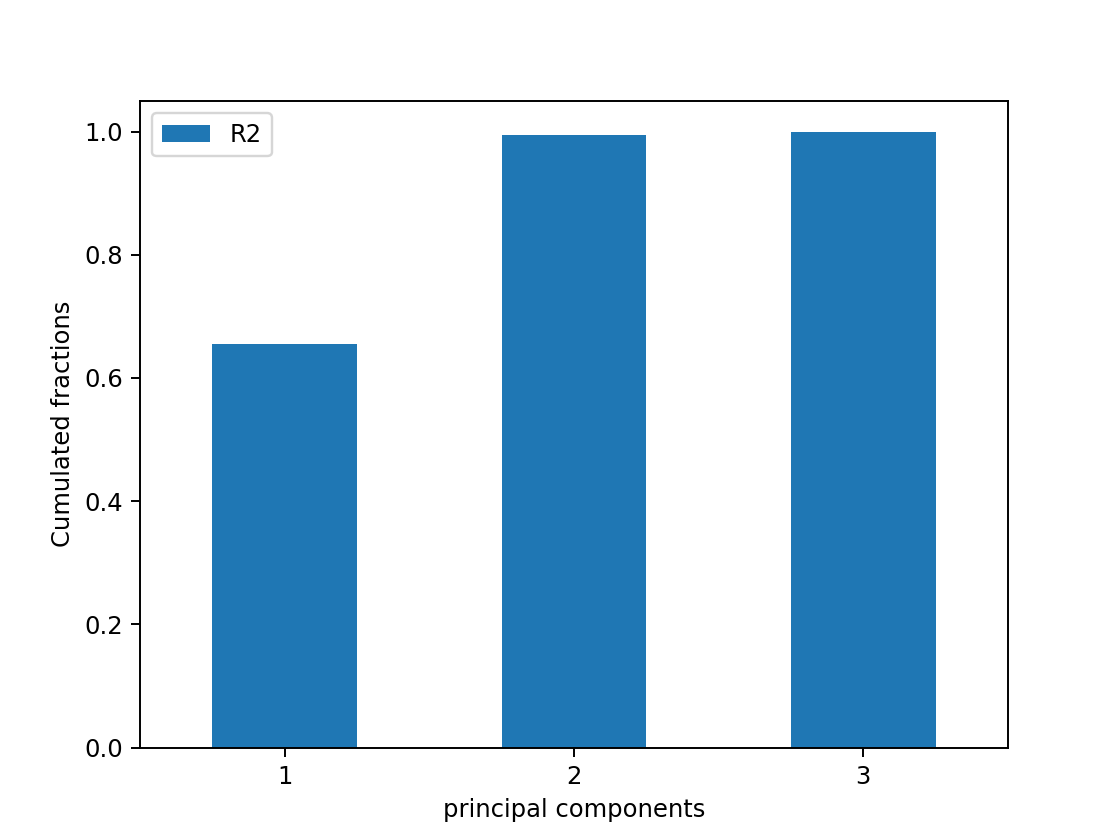

Text(0, 0.5, 'Cumulated fractions')

In [29]:
R2_axes = R2_df.plot.bar(rot=0)
R2_axes.set_xlabel('principal components')
R2_axes.set_ylabel('Cumulated fractions')

### Pandas plotting, further info
https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Make a PLS model with the same data

In [30]:
y = named_Obs_dataFrame.loc['fm01':'fm10' , ['Met']]
display(y)

,Met
sample,
fm01,0.19112
fm02,0.19112
fm03,0.19112
fm04,0.23890
fm05,0.23890
fm06,0.23890
fm07,0.23890
fm08,0.28668
fm09,0.28668


### Evaluate the cross-validatation (Q2) to determine the number of components 

Max number of components reduced to: 4


<IPython.core.display.Javascript object>


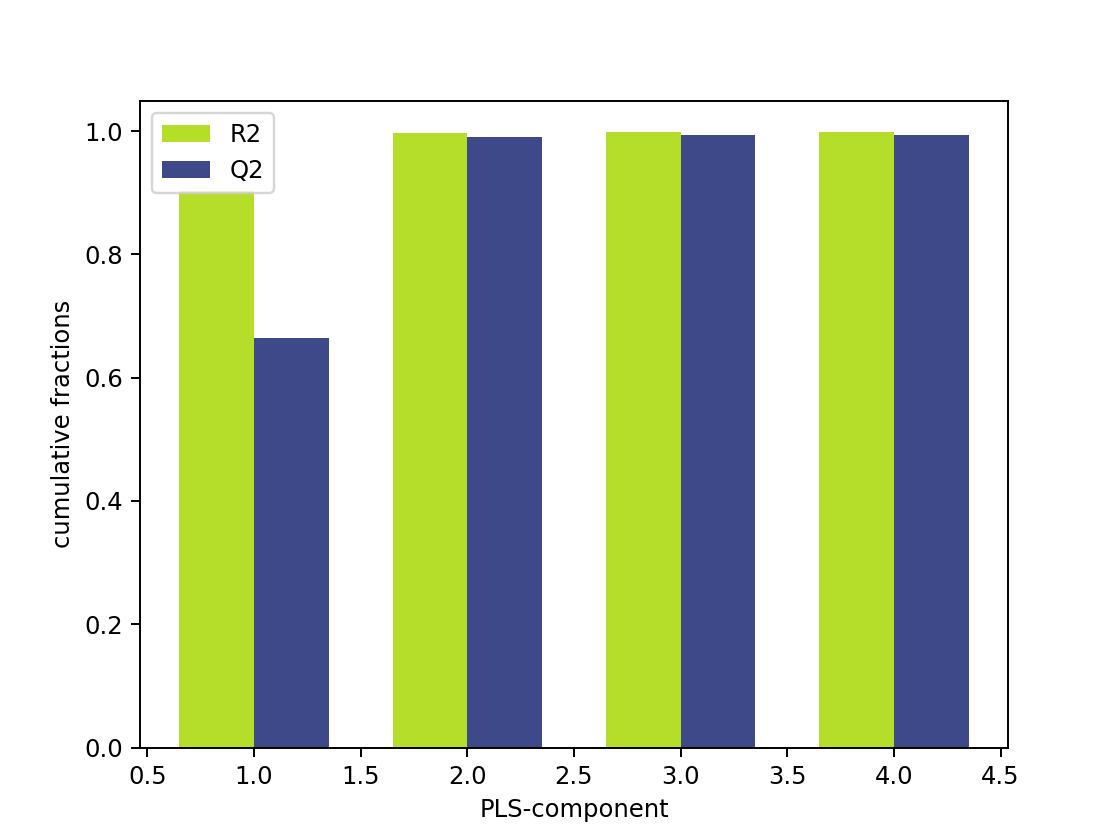

Q2 [0.66441481 0.99013783 0.99404477 0.99404441]


In [31]:
R2, Q2 = mv.evalPLS_Q2(data, y)
print('Q2', Q2)

In [32]:
M1 = mv.PLS_model(n_components=2)
M1.fit(data, y)

In [33]:
M1.P

array([[ 0.43751891,  0.94357172,  0.02331159,  0.07235997,  0.1458101 ,
         0.07026802, -0.00953342],
       [ 0.76920586, -0.1160966 ,  0.10068351,  0.26690455,  0.47582309,
         0.28546601,  0.07608938]])

In [34]:
M1.T

array([[-0.17378279, -0.09601567],
       [-0.13879691,  0.01978652],
       [-0.08003995,  0.16718944],
       [-0.03600062, -0.13554972],
       [ 0.00882111, -0.00294396],
       [ 0.03778404,  0.115467  ],
       [ 0.0259331 ,  0.09369594],
       [ 0.08879696, -0.16133306],
       [ 0.11611195, -0.06179027],
       [ 0.15117312,  0.06149378]])

### Get the residuals after the number of components selected for model M1

In [35]:
Epred0 = M1.Epred(data)
Epred0

,250,278,306,334,362,390,418
sample,,,,,,,
fm01,0.001096,-0.000327,-0.001414,-0.001060,-0.000091,-0.000892,-0.001542
fm02,0.005714,-0.001697,-0.006870,-0.004163,-0.001243,-0.004772,-0.008280
fm03,-0.005603,0.001724,0.007834,0.004358,0.000564,0.004749,0.009363
fm04,-0.000825,0.000210,0.000350,0.000616,0.000608,0.000384,0.000551
fm05,-0.005951,0.001756,0.008200,0.005076,0.001075,0.004392,0.008120
fm06,-0.005876,0.001617,0.003286,0.003333,0.002970,0.005036,0.006230
fm07,0.008676,-0.002523,-0.009082,-0.006102,-0.002760,-0.006721,-0.011801
fm08,-0.004533,0.001365,0.005307,0.003285,0.000675,0.004284,0.006874
fm09,0.004178,-0.001201,-0.004523,-0.003212,-0.001153,-0.003380,-0.005106


In [36]:
T_df, W_df, E_df = results_to_pandas(data, M1.T, M1.W, P_symbol='w')

<IPython.core.display.Javascript object>


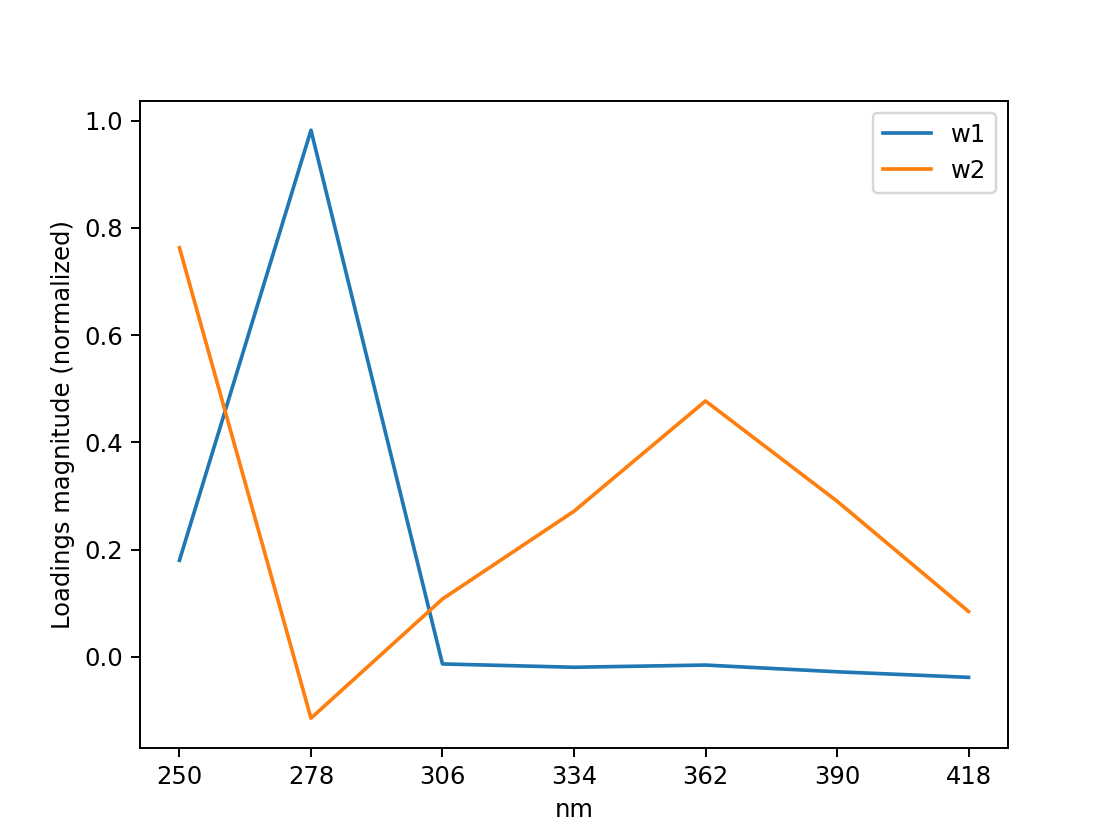

Text(0, 0.5, 'Loadings magnitude (normalized)')

In [37]:
pd_axes = W_df.T.plot()
pd_axes.set_xlabel('nm')
pd_axes.set_ylabel('Loadings magnitude (normalized)')

### Experiment with scaling to get visible size differences of markers in the scatter plot

In [38]:
(20*y)**3

,Met
sample,
fm01,55.848098
fm02,55.848098
fm03,55.848098
fm04,109.078327
fm05,109.078327
fm06,109.078327
fm07,109.078327
fm08,188.487361
fm09,188.487361


<IPython.core.display.Javascript object>


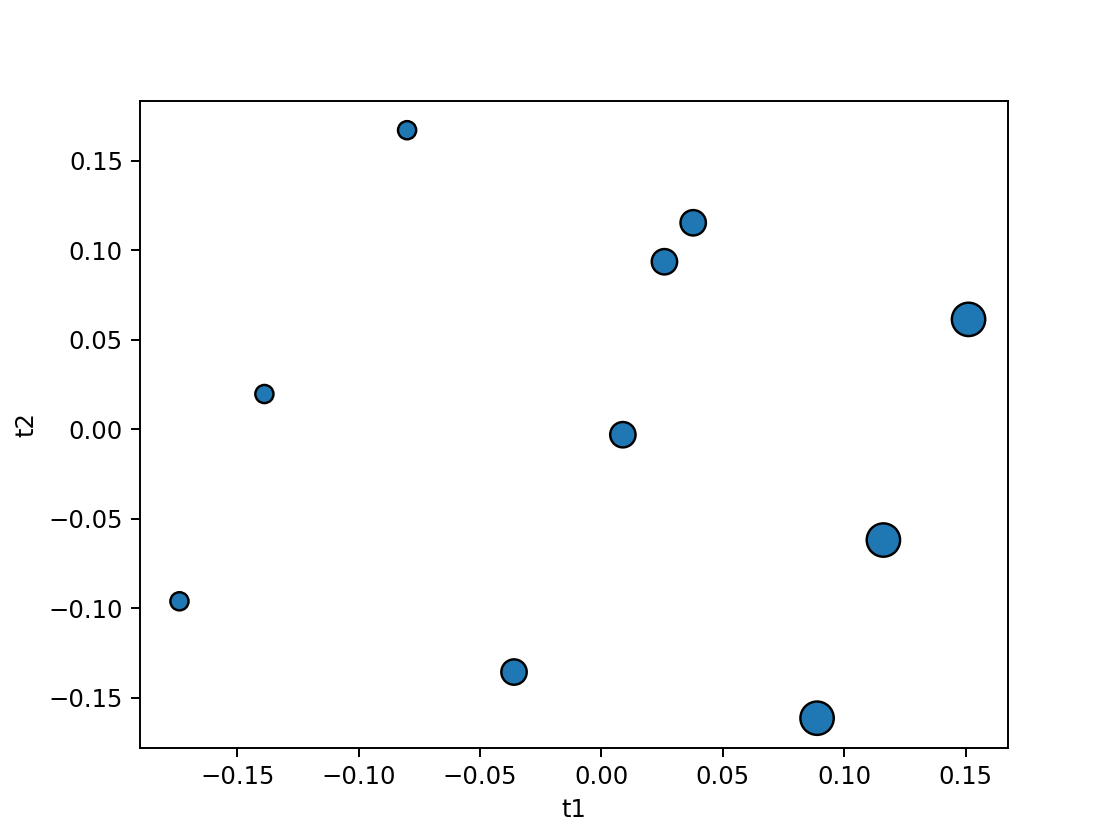

<AxesSubplot:xlabel='t1', ylabel='t2'>

In [39]:
T_df.plot.scatter(x='t1', y='t2', s=(20*y)**3, edgecolor='k')

In [40]:
test_set = named_Obs_dataFrame.loc['fm11':'fm12' , '250':'418']
test_set

,250,278,306,334,362,390,418
sample,,,,,,,
fm11,0.529496,0.074750,0.028027,0.131487,0.270114,0.141439,0.009292
fm12,0.133005,0.752452,0.008606,0.001916,0.002508,0.002149,0.012900


In [41]:
test_set_y = named_Obs_dataFrame.loc['fm11':'fm12' , ['Met']]
test_set_y

,Met
sample,
fm11,0.00000
fm12,0.28668


In [42]:
M1.predict(test_set)

array([[0.0033882 ],
       [0.29754326]])

In [43]:
M1.DModXpred(test_set)

sample
fm11    3.673598
fm12    3.745727
dtype: float64

In [44]:
M1.DModXpred(data)

sample
fm01    0.156740
fm02    0.788641
fm03    0.852910
fm04    0.086360
fm05    0.837693
fm06    0.670997
fm07    1.128367
fm08    0.642121
fm09    0.534821
fm10    0.419721
dtype: float64